# Chapter 8 Handling Images

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import cv2
print(cv2.__version__)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

4.5.2


## 8.1 Loading Image

(2270, 3600) uint8


(-0.5, 3599.5, 2269.5, -0.5)

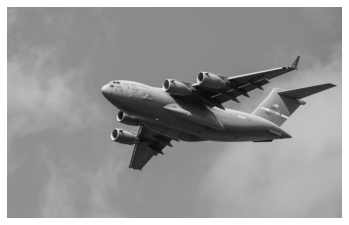

(-0.5, 3599.5, 2269.5, -0.5)

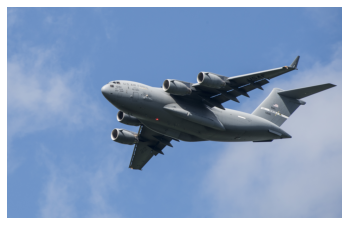

In [2]:
image = cv2.imread("data/ch08_image/images/plane.jpg", cv2.IMREAD_GRAYSCALE)
print(image.shape, image.dtype)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

image_bgr = cv2.imread("data/ch08_image/images/plane.jpg", cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

## 8.2 Saving Images

In [3]:
image = cv2.imread("data/ch08_image/images/plane.jpg", cv2.IMREAD_GRAYSCALE)
cv2.imwrite("data/ch08_image/images/plane_new.jpg", image)

True

## 8.3 Resizing Images

(-0.5, 49.5, 49.5, -0.5)

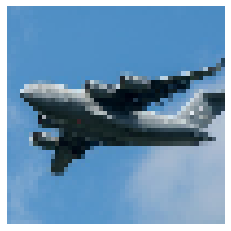

In [4]:
image = cv2.imread("data/ch08_image/images/plane_256x256.jpg", cv2.IMREAD_COLOR)
image_50x50 = cv2.resize(image, (50, 50))
image_50x50 = cv2.cvtColor(image_50x50, cv2.COLOR_BGR2RGB)
plt.imshow(image_50x50)
plt.axis('off')
plt.show()

## 8.4 Cropping Images

(-0.5, 127.5, 255.5, -0.5)

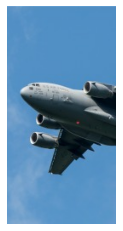

In [5]:
image = cv2.imread("data/ch08_image/images/plane_256x256.jpg", cv2.IMREAD_COLOR)
image_cropped = image[:, :128]
image_cropped = cv2.cvtColor(image_cropped, cv2.COLOR_BGR2RGB)
plt.imshow(image_cropped)
plt.axis('off')
plt.show()

## 8.5 Blurring Images

(-0.5, 255.5, 255.5, -0.5)

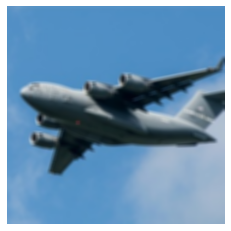

([], [])

([], [])

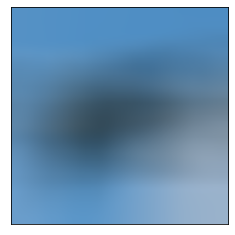

In [6]:
image = cv2.imread("data/ch08_image/images/plane_256x256.jpg", cv2.IMREAD_COLOR)
# box kernel with shape (5, 5)
image_blurry = cv2.blur(image, (5, 5))
image_blurry = cv2.cvtColor(image_blurry, cv2.COLOR_BGR2RGB)
plt.imshow(image_blurry)
plt.axis('off')
plt.show()

image_very_blurry = cv2.blur(image, (100, 100))
image_very_blurry = cv2.cvtColor(image_very_blurry, cv2.COLOR_BGR2RGB)
plt.imshow(image_very_blurry)
plt.xticks([])
plt.yticks([])
plt.show()

([], [])

([], [])

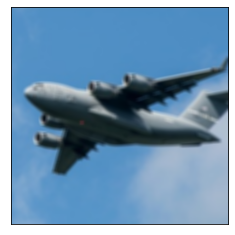

In [7]:
box_kernel = np.ones((5, 5)) / 25.0
image_kernel = cv2.filter2D(image, -1, box_kernel)
image_kernel = cv2.cvtColor(image_kernel, cv2.COLOR_BGR2RGB)
plt.imshow(image_kernel)
plt.xticks([])
plt.yticks([])
plt.show()

## 8.6 Sharperning Images

<AxesSubplot:>

(0.0, 1.0, 0.0, 1.0)

<AxesSubplot:>

(0.0, 1.0, 0.0, 1.0)

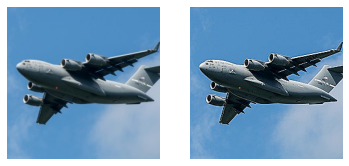

In [8]:
image = cv2.imread("data/ch08_image/images/plane_256x256.jpg", cv2.IMREAD_COLOR)
kernel = np.array([[0,  -1,  0],
                   [-1,  5, -1],
                   [0,  -1,  0]])
image_sharp = cv2.filter2D(image, -1, kernel)
plt.subplot(1, 2, 1)
plt.axis('off')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.axis('off')
image_sharp = cv2.cvtColor(image_sharp, cv2.COLOR_BGR2RGB)
plt.imshow(image_sharp)
plt.show()

## 8.7 Enhancing Contrast

(-0.5, 255.5, 255.5, -0.5)

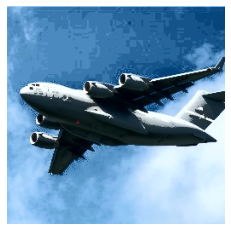

In [9]:
image = cv2.imread("data/ch08_image/images/plane_256x256.jpg", cv2.IMREAD_COLOR)
# if it is a gray scale image, just transform it
# otherwise, convert into YUV color format
image_yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:, :, 0])
image_enhanced = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2RGB)
plt.imshow(image_enhanced)
plt.axis('off')
plt.show()

## 8.8 Isolating Colors

<AxesSubplot:>

(-0.5, 255.5, 255.5, -0.5)

<AxesSubplot:>

(-0.5, 255.5, 255.5, -0.5)

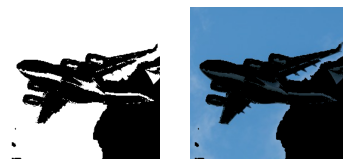

In [10]:
image_bgr = cv2.imread("data/ch08_image/images/plane_256x256.jpg", cv2.IMREAD_COLOR)
image_hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV)
# define range of blue values in HSV
lower_blue = np.array([50, 100, 50])
upper_blue = np.array([130, 255, 255])

mask = cv2.inRange(image_hsv, lower_blue, upper_blue)
image_bgr_masked = cv2.bitwise_and(image_bgr, image_bgr, mask=mask)
plt.subplot(1, 2, 1)
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
plt.imshow(mask)
plt.axis('off')
plt.subplot(1, 2, 2)
image_rgb = cv2.cvtColor(image_bgr_masked, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

## 8.9 Binarizing Images

(-0.5, 255.5, 255.5, -0.5)

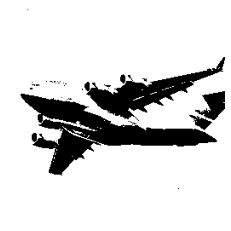

In [11]:
# used for denoising the image
image = cv2.imread("data/ch08_image/images/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE)
# apply adaptive threshold
max_output_value = 255 # max intensity of the output intensity
neighbour_size = 99 # block size
subtract_from_mean = 10 # use to manually fine-tune the threshold
# cv2.ADAPTIVE_THRESH_GAUSSIAN_C use Gaussian weight
image_binarized = cv2.adaptiveThreshold(image,
                                        max_output_value,
                                        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY,
                                        neighbour_size,
                                        subtract_from_mean)

plt.imshow(image_binarized, cmap='gray')
plt.axis('off')
plt.show()

(-0.5, 255.5, 255.5, -0.5)

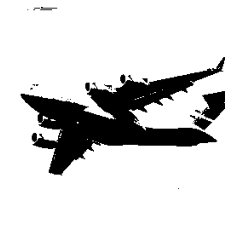

In [12]:
# use mean weight
image_binarized = cv2.adaptiveThreshold(image,
                                        max_output_value,
                                        cv2.ADAPTIVE_THRESH_MEAN_C,
                                        cv2.THRESH_BINARY,
                                        neighbour_size,
                                        subtract_from_mean)

plt.imshow(image_binarized, cmap='gray')
plt.axis('off')
plt.show()

## 8.10 Removing Backgrounds

(0.0, 1.0, 0.0, 1.0)

(0.0, 1.0, 0.0, 1.0)

(0.0, 1.0, 0.0, 1.0)

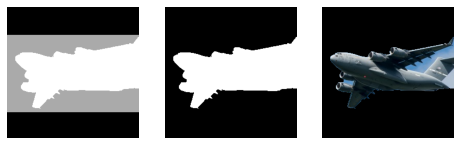

In [13]:
image_bgr = cv2.imread("data/ch08_image/images/plane_256x256.jpg", cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# rectangle value: start x, start y, width, height
rectangle = (0, 56, 256, 150)
# create mask
mask = np.zeros(image_rgb.shape[:2], np.uint8)
# create temporary arrays used by grabCut
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)
# run grabCut (to ignore return value)
mask, bgdModel, fgdModel = cv2.grabCut(image_rgb, mask, rectangle, bgdModel, fgdModel,
            5, # number of iterations
            cv2.GC_INIT_WITH_RECT) # Initiative using our rectangle
# create mask wheresure and likely background set to 0, otherwise 1
# 0, 2 means background, 1, 3 means foreground
mask_2 = np.where((mask == 2) | (mask == 0), 0, 1).astype(np.uint8)
# multiply image with new mask to subtract background
image_rgb_nobg = image_rgb * mask_2[:, :, np.newaxis]

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(131)
ax.axis('off')
ax.imshow(mask, cmap='gray')
ax = fig.add_subplot(132)
ax.axis('off')
ax.imshow(mask_2, cmap='gray')
ax = fig.add_subplot(133)
ax.axis('off')
ax.imshow(image_rgb_nobg)
plt.show()

## 8.11 Detecting Edges

132.0 45.91683477898078


(-0.5, 255.5, 255.5, -0.5)

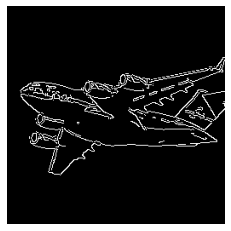

In [14]:
image = cv2.imread("data/ch08_image/images/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE)
median_intensity = np.median(image)
std_intensity = np.std(image)
print(median_intensity, std_intensity)
# set thresholds to be one std above or below median intensity
lower_threshold = int(max(0, median_intensity - std_intensity))
upper_threshold = int(min(255, median_intensity + std_intensity))

image_canny = cv2.Canny(image, lower_threshold, upper_threshold)
plt.imshow(image_canny, cmap='gray')
plt.axis('off')
plt.show()

## 8.12 Detecting Corners

<AxesSubplot:>

(-0.5, 255.5, 255.5, -0.5)

<AxesSubplot:>

(-0.5, 255.5, 255.5, -0.5)

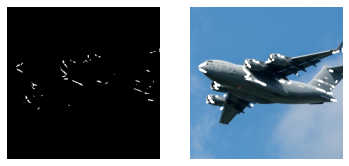

In [15]:
image_bgr = cv2.imread("data/ch08_image/images/plane_256x256.jpg", cv2.IMREAD_COLOR)
image_gray = cv2.imread("data/ch08_image/images/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE)
image_gray = np.float32(image_gray)

# set corner detector parameters
block_size = 2
aperture = 29
free_parameter = 0.04
threshold = 0.02

responce = cv2.cornerHarris(image_gray,
                           block_size,
                           aperture,
                           free_parameter)
# get corners
corners = np.zeros_like(image_bgr, dtype=np.uint8)
corners[responce > threshold * responce.max()] = [255, 255, 255]
# larger corner markers
responce = cv2.dilate(responce, None)
# only keep responce greater than threshold, mark as white
image_bgr[responce > threshold * responce.max()] = [255, 255, 255]

plt.subplot(1, 2, 1)
plt.imshow(corners)
plt.axis('off')
plt.subplot(1, 2, 2)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

## 8.13 Creating Features for Machine Learning

In [16]:
image = cv2.imread("data/ch08_image/images/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE)
image_10x10 = cv2.resize(image, (10, 10))
image_10x10.flatten()
# one pixel one feature

array([133, 130, 130, 129, 130, 129, 129, 128, 128, 127, 135, 131, 131,
       131, 130, 130, 129, 128, 128, 128, 134, 132, 131, 131, 130, 129,
       129, 128, 130, 133, 132, 158, 130, 133, 130,  46,  97,  26, 132,
       143, 141,  36,  54,  91,   9,   9,  49, 144, 179,  41, 142,  95,
        32,  36,  29,  43, 113, 141, 179, 187, 141, 124,  26,  25, 132,
       135, 151, 175, 174, 184, 143, 151,  38, 133, 134, 139, 174, 177,
       169, 174, 155, 141, 135, 137, 137, 152, 169, 168, 168, 179, 152,
       139, 136, 135, 137, 143, 159, 166, 171, 175], dtype=uint8)

## 8.14 Encoding Mean Color as a Feature

In [17]:
image_bgr = cv2.imread("data/ch08_image/images/plane_256x256.jpg", cv2.IMREAD_COLOR)
# mean of each channel
channels = cv2.mean(image_bgr)
# bgr to rgb
observation = np.array([channels[2::-1]])
observation

array([[ 90.52377319, 133.11940002, 169.02355957]])

(-0.5, 2.5, 0.5, -0.5)

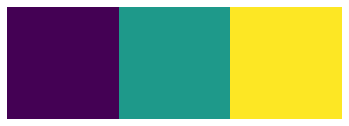

In [18]:
plt.imshow(observation)
plt.axis("off")
plt.show()

## 8.15 Encoding Color Histogram as Features

(0.0, 256.0)

(0.0, 256.0)

(0.0, 256.0)

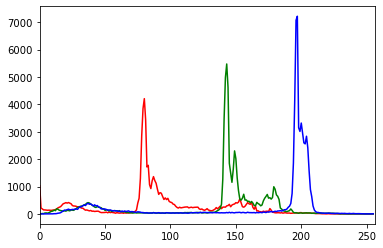

In [19]:
image_bgr = cv2.imread("data/ch08_image/images/plane_256x256.jpg", cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
colors = ('r', 'g', 'b')
# calculate histogram
for i, channel in enumerate(colors):
    histogram = cv2.calcHist([image_rgb], # image
                             [i], # index of channel
                             None, # no mask
                             [256], # Histogram size
                             [0, 256]) # range
    plt.plot(histogram, color=channel)
    plt.xlim([0, 256])